# Factors that gets you an interview call before graduation

In [282]:
#options(download.file.method = 'wget')


#install.packages('GoodmanKruskal')
#install.packages('corrplot')
#install.packages("ggplot2")
#install.packages("caTools")
#install.packages("pROC")

In [283]:
library('GoodmanKruskal')
library('corrplot')
library('ggplot2')
library("caTools")
library("pROC")
library("caret")

In [284]:
# Reading data
Hist_Candidate <- read.csv("/Users/divyavakil/Downloads/MSBA_2015_2016_Job_Offer_Historical_Data.csv")

In [285]:
head(Hist_Candidate)

Year,Candidate,Job_Reporting_Status,Citizenship_Status,Work_Experience,Undergraduate_Major,Date_Offer_Received,Date_Offer_Accepted
2015,2015_1,Accepted_an_offer,F1_Student,1_-_3_Years,Computer,5/19/15,5/22/15
2015,2015_2,Accepted_an_offer,US_Citizen,Less_than_1_year,Business,4/24/15,4/27/15
2015,2015_3,No_offer_accepted,F1_Student,1_-_3_Years,Computer,,
2015,2015_4,Accepted_an_offer,F1_Student,1_-_3_Years,Statistics,6/29/15,7/10/15
2015,2015_5,Accepted_an_offer,F1_Student,3_-_5_Years,Engineering,4/30/15,5/6/15
2015,2015_6,Accepted_an_offer,US_Citizen,1_-_3_Years,Statistics,4/2/15,4/6/15


In [286]:
# Data Summary
str(Hist_Candidate)

'data.frame':	198 obs. of  8 variables:
 $ Year                : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ Candidate           : Factor w/ 198 levels "2015_1","2015_10",..: 1 11 22 31 41 52 63 74 85 2 ...
 $ Job_Reporting_Status: Factor w/ 2 levels "Accepted_an_offer",..: 1 1 2 1 1 1 1 2 1 1 ...
 $ Citizenship_Status  : Factor w/ 5 levels "F1_Student","H1b_Temp_Spec_Worker",..: 1 5 1 1 1 5 5 1 5 5 ...
 $ Work_Experience     : Factor w/ 5 levels "1_-_3_Years",..: 1 5 1 1 3 1 5 3 5 5 ...
 $ Undergraduate_Major : Factor w/ 5 levels "Business","Computer",..: 2 1 2 5 3 5 4 2 1 5 ...
 $ Date_Offer_Received : Factor w/ 117 levels "","1/27/15","10/1/14",..: 65 43 1 86 50 41 57 1 55 22 ...
 $ Date_Offer_Accepted : Factor w/ 115 levels "","1/12/15","11/11/15",..: 62 40 1 86 70 46 32 1 48 15 ...


In [287]:
# To rename values in a column

#Hist_Candidate$Work_Experience <- as.character(Hist_Candidate$Work_Experience)
#Hist_Candidate$Work_Experience[Hist_Candidate$Work_Experience == '1_-_3_Years'] <- "1-3_Years"
#Hist_Candidate$Work_Experience <- as.factor(Hist_Candidate$Work_Experience)

value_update <- function(val){
    if (val == "Less_than_1_year"){
        return ('<1_Year')
    }
    else if (val == "1_-_3_Years"){
        return ('1-3_Years')
    }
    else if (val == "3_-_5_Years"){
        return ('3-5_Years')
    }
    else if (val == "5_-_10_Years"){
        return ('5-10_Years')
    }
    else {
        return ('10-15_Years')
    }
    
}

Hist_Candidate$Work_Experience <- sapply(Hist_Candidate[, 5], value_update)
Hist_Candidate$Work_Experience <- as.factor(Hist_Candidate$Work_Experience)
unique(Hist_Candidate$Work_Experience)

str(Hist_Candidate)


[1] 1-3_Years   <1_Year     3-5_Years   5-10_Years  10-15_Years
Levels: <1_Year 1-3_Years 10-15_Years 3-5_Years 5-10_Years

'data.frame':	198 obs. of  8 variables:
 $ Year                : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ Candidate           : Factor w/ 198 levels "2015_1","2015_10",..: 1 11 22 31 41 52 63 74 85 2 ...
 $ Job_Reporting_Status: Factor w/ 2 levels "Accepted_an_offer",..: 1 1 2 1 1 1 1 2 1 1 ...
 $ Citizenship_Status  : Factor w/ 5 levels "F1_Student","H1b_Temp_Spec_Worker",..: 1 5 1 1 1 5 5 1 5 5 ...
 $ Work_Experience     : Factor w/ 5 levels "<1_Year","1-3_Years",..: 2 1 2 2 4 2 1 4 1 1 ...
 $ Undergraduate_Major : Factor w/ 5 levels "Business","Computer",..: 2 1 2 5 3 5 4 2 1 5 ...
 $ Date_Offer_Received : Factor w/ 117 levels "","1/27/15","10/1/14",..: 65 43 1 86 50 41 57 1 55 22 ...
 $ Date_Offer_Accepted : Factor w/ 115 levels "","1/12/15","11/11/15",..: 62 40 1 86 70 46 32 1 48 15 ...


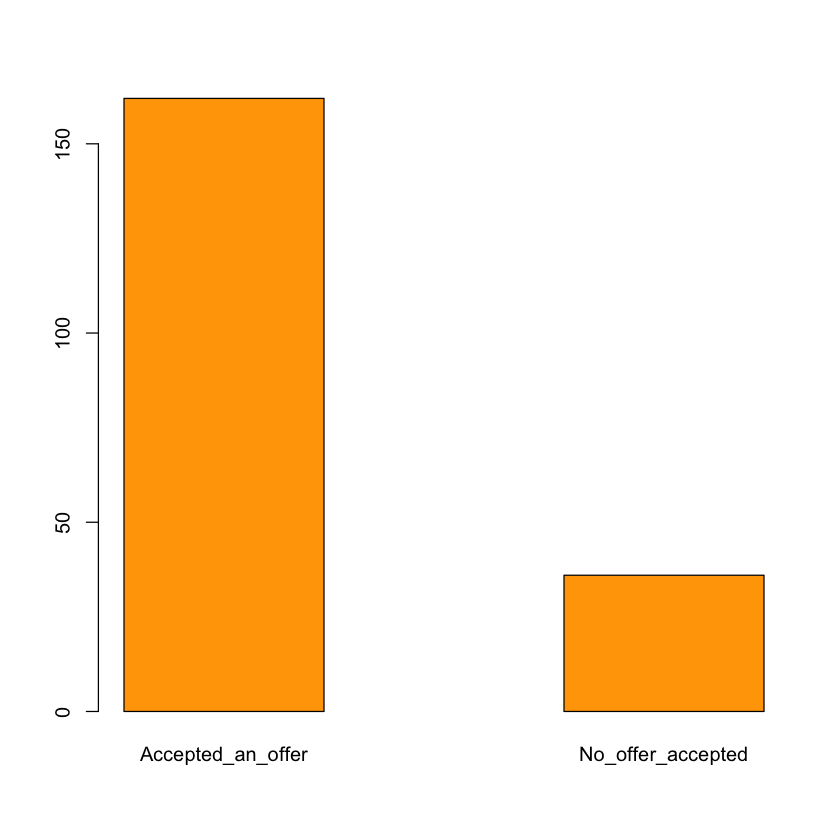

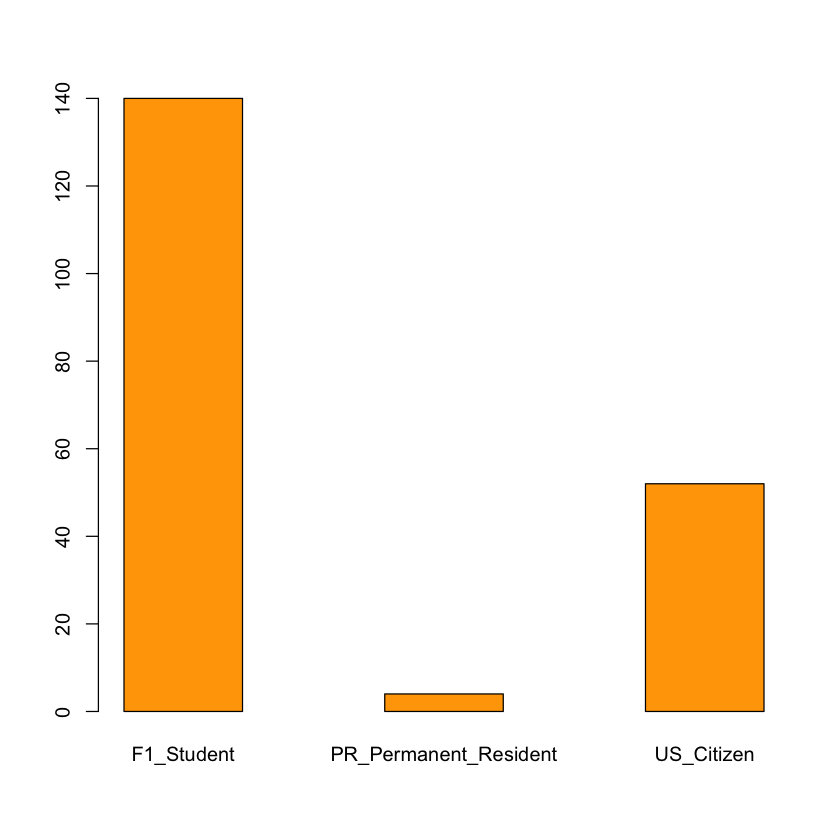

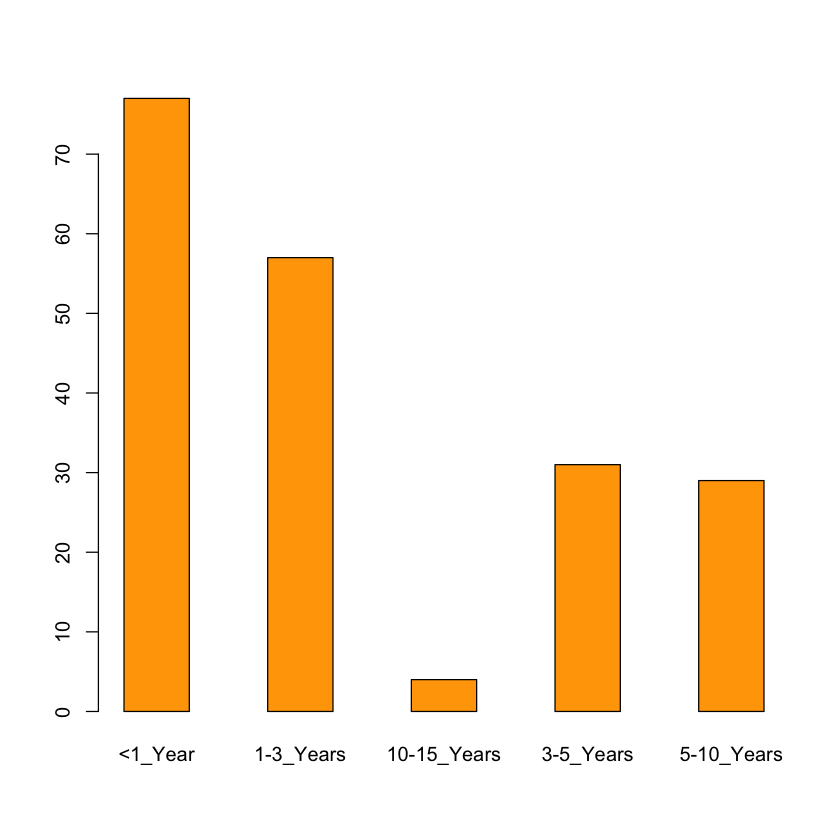

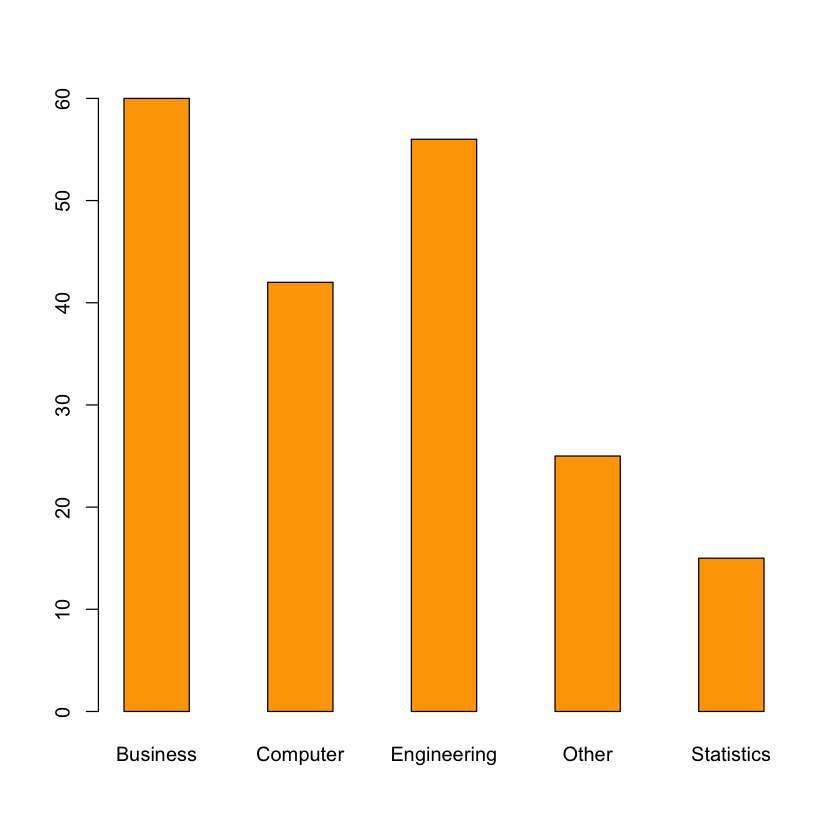

In [288]:
# Visualizing categorizing variables 

cat_vars = names(Hist_Candidate[3:6])

for (i in cat_vars) {
freq_tab = table(Hist_Candidate[i])
barplot(freq_tab[freq_tab>=2], col = 'orange', width =1.5, space = 1.2, axisnames = TRUE )
}



In [289]:

CrossTable(Job_Reporting_Status, Citizenship_Status, data = Hist_Candidate ,chisq = TRUE, expected = TRUE, dnn = c("Recomm", "AccSize"))


ERROR: Error in CrossTable(Job_Reporting_Status, Citizenship_Status, data = Hist_Candidate, : could not find function "CrossTable"


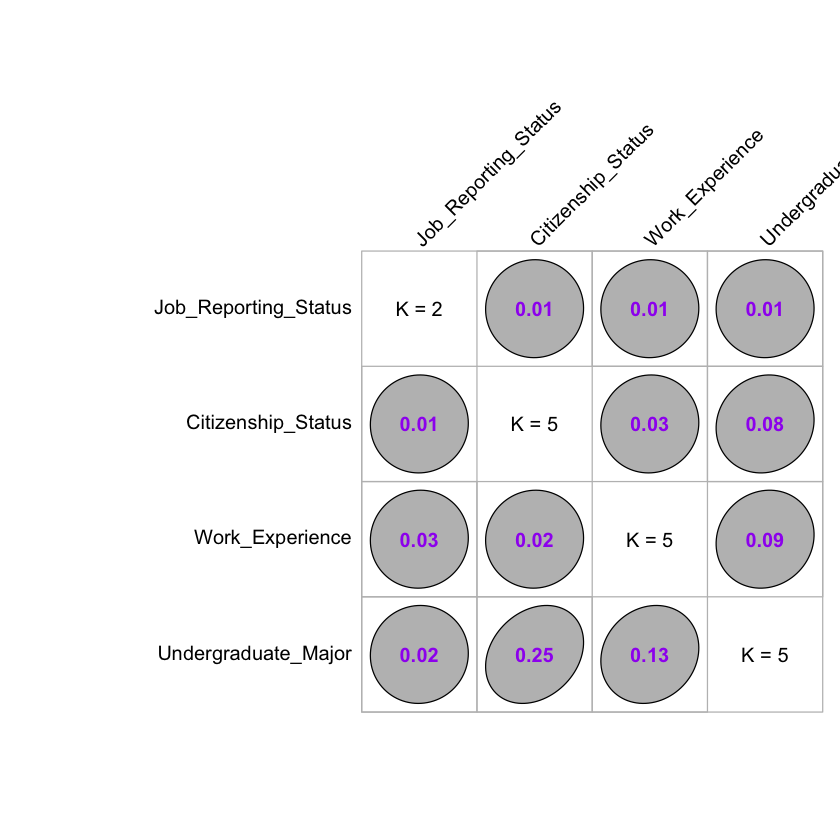

In [290]:
#asymmetric association measure between two categorical variables
#based on the extent to which variation in one variable can be explained by the other.
GKmatrix1<- GKtauDataframe(Hist_Candidate[3:6])
plot(GKmatrix1, corrColors = "purple")

In [291]:
##Creating a subset of only relevant variables & those variables which do not create a perfect separation of target var
Hist_Candidate_Subset = Hist_Candidate[,3:6]
Hist_Candidate_Subset$Year = Hist_Candidate[,1]

In [292]:
##Running logistic regression on Historical data

#Clearly, having Work Experience in the range of 1-3 years have significant impact statistically 

mylogit <- glm(Job_Reporting_Status ~ . -Year, data = Hist_Candidate_Subset, family = "binomial")

summary(mylogit)


Call:
glm(formula = Job_Reporting_Status ~ . - Year, family = "binomial", 
    data = Hist_Candidate_Subset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9531  -0.6796  -0.4973  -0.2886   2.2092  

Coefficients:
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                               -0.59596    0.36404  -1.637   0.1016
Citizenship_StatusH1b_Temp_Spec_Worker   -15.65383 2399.54479  -0.007   0.9948
Citizenship_StatusOther                  -15.65383 2399.54479  -0.007   0.9948
Citizenship_StatusPR_Permanent_Resident    0.04243    1.21380   0.035   0.9721
Citizenship_StatusUS_Citizen              -0.70890    0.54381  -1.304   0.1924
Work_Experience1-3_Years                  -1.04428    0.56266  -1.856   0.0635
Work_Experience10-15_Years               -15.34780 1166.74109  -0.013   0.9895
Work_Experience3-5_Years                  -1.11338    0.68029  -1.637   0.1017
Work_Experience5-10_Years                 -0.33815

In [293]:
##Running logistic regression on Historical data

#If we do not take into consideration Undergraduate Major;
#the results show their is a significant impact of being a US citizen too other than having a work experience of 1-3 years

mylogit <- glm(Job_Reporting_Status ~ . -Year  -Undergraduate_Major, data = Hist_Candidate_Subset, family = "binomial")

summary(mylogit)



Call:
glm(formula = Job_Reporting_Status ~ . - Year - Undergraduate_Major, 
    family = "binomial", data = Hist_Candidate_Subset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9350  -0.7552  -0.5463  -0.3636   2.3448  

Coefficients:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                               -0.8627     0.2962  -2.913  0.00358
Citizenship_StatusH1b_Temp_Spec_Worker   -15.4574  2399.5448  -0.006  0.99486
Citizenship_StatusOther                  -15.4574  2399.5448  -0.006  0.99486
Citizenship_StatusPR_Permanent_Resident    0.2617     1.2002   0.218  0.82741
Citizenship_StatusUS_Citizen              -0.8563     0.4937  -1.734  0.08287
Work_Experience1-3_Years                  -0.9640     0.4908  -1.964  0.04951
Work_Experience10-15_Years               -15.5246  1185.7935  -0.013  0.98955
Work_Experience3-5_Years                  -0.9419     0.6064  -1.553  0.12037
Work_Experience5-10_Years            

In [294]:
#Reading Survey Data
Candidate <- read.csv("/Users/divyavakil/Downloads/Survey Response Data - Job Searching.xlsx - Final Edited File.csv")

In [295]:
str(Candidate)

'data.frame':	105 obs. of  40 variables:
 $ X1..What.is.your.age...example..24.                                                                      : int  28 24 28 42 25 23 23 28 25 25 ...
 $ X2..What.is.your.gender.                                                                                 : Factor w/ 2 levels "Female","Male": 2 1 1 2 1 1 1 2 2 1 ...
 $ X3..What.program.are.you.in.                                                                             : Factor w/ 4 levels "MRED","MS-FIN",..: 3 3 3 1 4 4 2 4 3 3 ...
 $ X4..How.many.years.of.work.experience.do.you.have...2.5.years.belongs.to.1.2.years.group.                : Factor w/ 5 levels "1 - 2 years",..: 2 5 3 4 2 5 1 2 5 1 ...
 $ X6..How.many.jobs.have.you.applied.                                                                      : Factor w/ 7 levels "0-5","11-15",..: 2 1 6 1 1 1 1 6 6 1 ...
 $ X7..What.is.your.undergraduate.major.                                                                    : Factor w/ 5 lev

In [296]:
#Excluding these variables as they create a perfect separation of target var
Candidate = Candidate[,!names(Candidate) %in% c("No","No.Interviews")]

In [297]:
#Making all the variables as factors
Candidate[] <- lapply(Candidate, function(x) as.factor(x))

In [298]:
# Taking a set of variables
num_var <- c('X1..What.is.your.age...example..24.' ,'X8..What.is.your.undergraduate.GPA...example..3.5.4.0.',
           'X15..How.many.career.coaching.appointments..including.peer.coach.appointments..have.you.had...example..5.',
           'X16..How.many.career.fairs.have.you.attended...example..5.',
           'X17..How.many.career.related.events.have.you.attended...example..5.')

In [299]:
# Making the set of variables as numeric
Candidate[,num_var] <- lapply(Candidate[,num_var] ,function(x) as.numeric(x))

In [300]:
str(Candidate) 

'data.frame':	105 obs. of  38 variables:
 $ X1..What.is.your.age...example..24.                                                                      : num  9 5 9 18 6 4 4 9 6 6 ...
 $ X2..What.is.your.gender.                                                                                 : Factor w/ 2 levels "Female","Male": 2 1 1 2 1 1 1 2 2 1 ...
 $ X3..What.program.are.you.in.                                                                             : Factor w/ 4 levels "MRED","MS-FIN",..: 3 3 3 1 4 4 2 4 3 3 ...
 $ X4..How.many.years.of.work.experience.do.you.have...2.5.years.belongs.to.1.2.years.group.                : Factor w/ 5 levels "1 - 2 years",..: 2 5 3 4 2 5 1 2 5 1 ...
 $ X6..How.many.jobs.have.you.applied.                                                                      : Factor w/ 7 levels "0-5","11-15",..: 2 1 6 1 1 1 1 6 6 1 ...
 $ X7..What.is.your.undergraduate.major.                                                                    : Factor w/ 5 levels "Busi

In [301]:
modified_survey <- Candidate

for (i in 0:38) {
  names(modified_survey)[i] <- paste("V", i, sep ="") 
}


In [302]:
str(modified_survey)

'data.frame':	105 obs. of  38 variables:
 $ V1 : num  9 5 9 18 6 4 4 9 6 6 ...
 $ V2 : Factor w/ 2 levels "Female","Male": 2 1 1 2 1 1 1 2 2 1 ...
 $ V3 : Factor w/ 4 levels "MRED","MS-FIN",..: 3 3 3 1 4 4 2 4 3 3 ...
 $ V4 : Factor w/ 5 levels "1 - 2 years",..: 2 5 3 4 2 5 1 2 5 1 ...
 $ V5 : Factor w/ 7 levels "0-5","11-15",..: 2 1 6 1 1 1 1 6 6 1 ...
 $ V6 : Factor w/ 5 levels "Business Related",..: 1 1 3 4 2 1 4 3 5 3 ...
 $ V7 : num  26 15 22 15 15 15 14 31 10 2 ...
 $ V8 : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ V9 : Factor w/ 2 levels "No","Yes": 1 1 2 1 2 1 1 2 1 2 ...
 $ V10: Factor w/ 4 levels "0-3","12-15",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ V11: Factor w/ 6 levels "0","1","2","3",..: 2 1 1 1 1 1 1 1 1 1 ...
 $ V12: Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 1 ...
 $ V13: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ V14: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ V15: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ V16: Factor w/ 

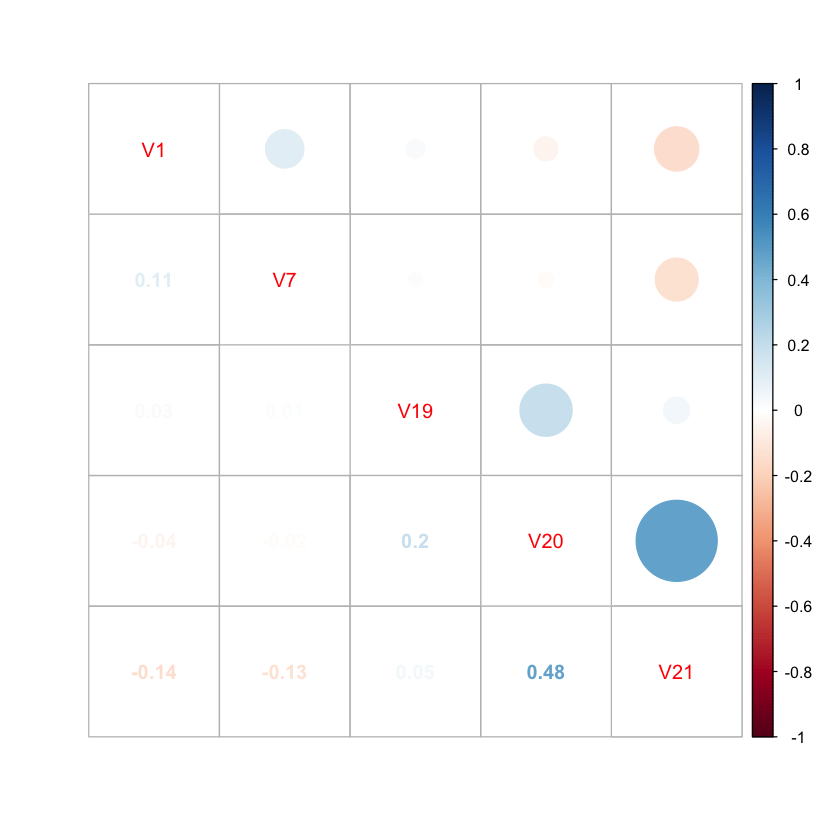

In [303]:
#Checking correlation of numeric variables
#As one might think, not all career related events are career fairs ;) #
M <- cor(modified_survey[, c("V1","V7","V19","V20","V21")])
corrplot.mixed(M)

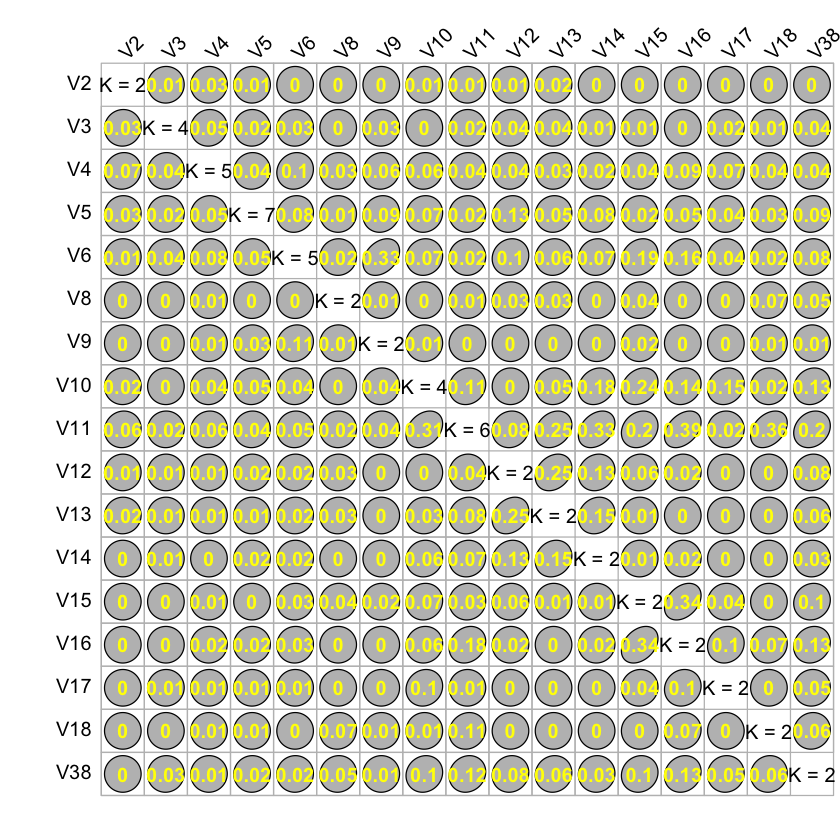

In [304]:
#asymmetric association measure between two categorical variables
#based on the extent to which variation in one variable can be explained by the other.
varset <- c("V2","V3","V4","V5", "V6", "V8", "V9", "V10","V11","V12","V13","V14","V15","V16","V17","V18","V38" )
GKmatrix1_varset<- subset(modified_survey, select = varset)
GKmatrix1<- GKtauDataframe(GKmatrix1_varset)

plot(GKmatrix1, corrColors = "yellow")

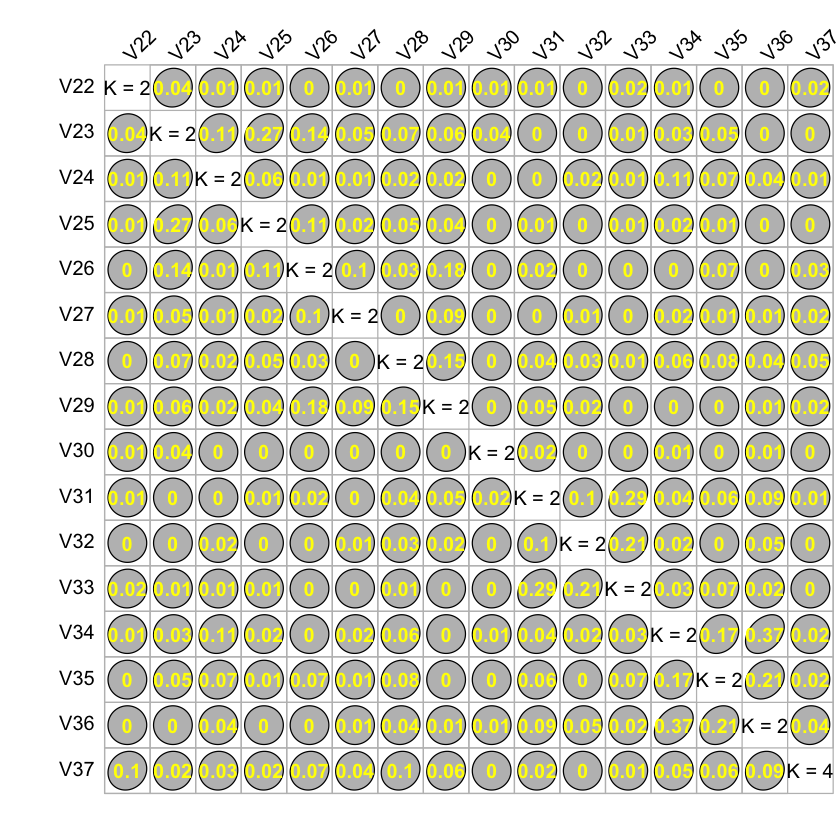

In [305]:
#asymmetric association measure between two categorical variables
#based on the extent to which variation in one variable can be explained by the other.
varset <- c("V22", "V23", "V24", "V25","V26","V27","V28","V29","V30","V31","V32","V33","V34","V35","V36","V37" )
GKmatrix1_varset<- subset(modified_survey, select = varset)
GKmatrix1<- GKtauDataframe(GKmatrix1_varset)
#summary(GKmatrix1)
plot(GKmatrix1, corrColors = "yellow")

In [306]:
fullmod = glm(Binary...Interview..1.0. ~ .,data = Candidate, family = "binomial", maxit =100)
summary(fullmod)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = Binary...Interview..1.0. ~ ., family = "binomial", 
    data = Candidate, maxit = 100)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-6.739e-06  -1.461e-06  -2.110e-08   1.393e-06   7.707e-06  

Coefficients: (1 not defined because of singularities)
                                                                                                            Estimate
(Intercept)                                                                                                9.166e+00
X1..What.is.your.age...example..24.                                                                        2.836e-01
X2..What.is.your.gender.Male                                                                              -1.646e+00
X3..What.program.are.you.in.MS-FIN                                                                         3.978e+00
X3..What.program.are.you.in.MSBA                                                                           

In [307]:
# Backward Step-wise Regression
backwards = step(fullmod)


Start:  AIC=116
Binary...Interview..1.0. ~ X1..What.is.your.age...example..24. + 
    X2..What.is.your.gender. + X3..What.program.are.you.in. + 
    X4..How.many.years.of.work.experience.do.you.have...2.5.years.belongs.to.1.2.years.group. + 
    X6..How.many.jobs.have.you.applied. + X7..What.is.your.undergraduate.major. + 
    X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + X10..When.considering.a.job..do.you.require.sponsorship.for.employment. + 
    X11..How.many.interviews.have.you.had.for.employment.after.graduation. + 
    X13..How.many.job.offers.have.you.received.for.employment.after.graduation. + 
    Career.Fair + WPC.Connect + ASU.Handshake + Indeed + Linkedin + 
    Glassdoor + Others + X15..How.many.career.coaching.appointments..including.peer.coach.appointments..have.you.had...example..5. + 
    X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...exam

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                                                            Df
- X6..How.many.jobs.have.you.applied.                                                                        6
- X7..What.is.your.undergraduate.major.                                                                      4
- X4..How.many.years.of.work.experience.do.you.have...2.5.years.belongs.to.1.2.years.group.                  4
- X13..How.many.job.offers.have.you.received.for.employment.after.graduation.                                4
- X3..What.program.are.you.in.                                                                               3
- Interview.Source...Others..No.is.reference.variable.right..                                                3
- X11..How.many.interviews.have.you.had.for.employment.after.graduation.                                     2
- Interview.Source...Career.Fair                                                                             1
-

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=104
Binary...Interview..1.0. ~ X1..What.is.your.age...example..24. + 
    X2..What.is.your.gender. + X3..What.program.are.you.in. + 
    X4..How.many.years.of.work.experience.do.you.have...2.5.years.belongs.to.1.2.years.group. + 
    X7..What.is.your.undergraduate.major. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + X10..When.considering.a.job..do.you.require.sponsorship.for.employment. + 
    X11..How.many.interviews.have.you.had.for.employment.after.graduation. + 
    X13..How.many.job.offers.have.you.received.for.employment.after.graduation. + 
    Career.Fair + WPC.Connect + ASU.Handshake + Indeed + Linkedin + 
    Glassdoor + Others + X15..How.many.career.coaching.appointments..including.peer.coach.appointments..have.you.had...example..5. + 
    X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    Excel + SQL + Python + Visua

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                                                            Df
- X4..How.many.years.of.work.experience.do.you.have...2.5.years.belongs.to.1.2.years.group.                  4
- X13..How.many.job.offers.have.you.received.for.employment.after.graduation.                                4
- X7..What.is.your.undergraduate.major.                                                                      4
- X3..What.program.are.you.in.                                                                               3
- Interview.Source...Others..No.is.reference.variable.right..                                                3
- X11..How.many.interviews.have.you.had.for.employment.after.graduation.                                     2
- Interview.Source...LinkedIn                                                                                1
- Interview.Source...Career.Fair                                                                             1
-

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=96
Binary...Interview..1.0. ~ X1..What.is.your.age...example..24. + 
    X2..What.is.your.gender. + X3..What.program.are.you.in. + 
    X7..What.is.your.undergraduate.major. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + X10..When.considering.a.job..do.you.require.sponsorship.for.employment. + 
    X11..How.many.interviews.have.you.had.for.employment.after.graduation. + 
    X13..How.many.job.offers.have.you.received.for.employment.after.graduation. + 
    Career.Fair + WPC.Connect + ASU.Handshake + Indeed + Linkedin + 
    Glassdoor + Others + X15..How.many.career.coaching.appointments..including.peer.coach.appointments..have.you.had...example..5. + 
    X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    Excel + SQL + Python + Visualization.Tools + R + Big.Data + 
    SPSS + SAS + Other.Tools + Interview.Source...Career.Fair + 


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                                                            Df
- X13..How.many.job.offers.have.you.received.for.employment.after.graduation.                                4
- X7..What.is.your.undergraduate.major.                                                                      4
- X3..What.program.are.you.in.                                                                               3
- Interview.Source...Others..No.is.reference.variable.right..                                                3
- X11..How.many.interviews.have.you.had.for.employment.after.graduation.                                     2
- ASU.Handshake                                                                                              1
- R                                                                                                          1
- Interview.Source...WPC.Connect                                                                             1
-

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=88
Binary...Interview..1.0. ~ X1..What.is.your.age...example..24. + 
    X2..What.is.your.gender. + X3..What.program.are.you.in. + 
    X7..What.is.your.undergraduate.major. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + X10..When.considering.a.job..do.you.require.sponsorship.for.employment. + 
    X11..How.many.interviews.have.you.had.for.employment.after.graduation. + 
    Career.Fair + WPC.Connect + ASU.Handshake + Indeed + Linkedin + 
    Glassdoor + Others + X15..How.many.career.coaching.appointments..including.peer.coach.appointments..have.you.had...example..5. + 
    X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    Excel + SQL + Python + Visualization.Tools + R + Big.Data + 
    SPSS + SAS + Other.Tools + Interview.Source...Career.Fair + 
    Interview.Source...WPC.Connect + Interview.Source...ASU.Handshake + 
    Interv

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                                                            Df
- X7..What.is.your.undergraduate.major.                                                                      4
- X11..How.many.interviews.have.you.had.for.employment.after.graduation.                                     3
- X3..What.program.are.you.in.                                                                               3
- Interview.Source...Others..No.is.reference.variable.right..                                                3
- Big.Data                                                                                                   1
- Career.Fair                                                                                                1
- X10..When.considering.a.job..do.you.require.sponsorship.for.employment.                                    1
- X8..What.is.your.undergraduate.GPA...example..3.5.4.0.                                                     1
-

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=80
Binary...Interview..1.0. ~ X1..What.is.your.age...example..24. + 
    X2..What.is.your.gender. + X3..What.program.are.you.in. + 
    X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + X10..When.considering.a.job..do.you.require.sponsorship.for.employment. + 
    X11..How.many.interviews.have.you.had.for.employment.after.graduation. + 
    Career.Fair + WPC.Connect + ASU.Handshake + Indeed + Linkedin + 
    Glassdoor + Others + X15..How.many.career.coaching.appointments..including.peer.coach.appointments..have.you.had...example..5. + 
    X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    Excel + SQL + Python + Visualization.Tools + R + Big.Data + 
    SPSS + SAS + Other.Tools + Interview.Source...Career.Fair + 
    Interview.Source...WPC.Connect + Interview.Source...ASU.Handshake + 
    Interview.Source...Indeed + Interview.Source..

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                                                            Df
- X3..What.program.are.you.in.                                                                               3
- X11..How.many.interviews.have.you.had.for.employment.after.graduation.                                     3
- Interview.Source...Others..No.is.reference.variable.right..                                                3
- X2..What.is.your.gender.                                                                                   1
- X1..What.is.your.age...example..24.                                                                        1
- Linkedin                                                                                                   1
- X16..How.many.career.fairs.have.you.attended...example..5.                                                 1
- X17..How.many.career.related.events.have.you.attended...example..5.                                        1
-

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=74
Binary...Interview..1.0. ~ X1..What.is.your.age...example..24. + 
    X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + X10..When.considering.a.job..do.you.require.sponsorship.for.employment. + 
    X11..How.many.interviews.have.you.had.for.employment.after.graduation. + 
    Career.Fair + WPC.Connect + ASU.Handshake + Indeed + Linkedin + 
    Glassdoor + Others + X15..How.many.career.coaching.appointments..including.peer.coach.appointments..have.you.had...example..5. + 
    X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    Excel + SQL + Python + Visualization.Tools + R + Big.Data + 
    SPSS + SAS + Other.Tools + Interview.Source...Career.Fair + 
    Interview.Source...WPC.Connect + Interview.Source...ASU.Handshake + 
    Interview.Source...Indeed + Interview.Source...LinkedIn + 
    Interview.Source...

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                                                            Df
- X11..How.many.interviews.have.you.had.for.employment.after.graduation.                                     3
- Interview.Source...Others..No.is.reference.variable.right..                                                3
- X2..What.is.your.gender.                                                                                   1
- X1..What.is.your.age...example..24.                                                                        1
- Linkedin                                                                                                   1
- X16..How.many.career.fairs.have.you.attended...example..5.                                                 1
- X8..What.is.your.undergraduate.GPA...example..3.5.4.0.                                                     1
- X10..When.considering.a.job..do.you.require.sponsorship.for.employment.                                    1
-

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=68
Binary...Interview..1.0. ~ X1..What.is.your.age...example..24. + 
    X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + X10..When.considering.a.job..do.you.require.sponsorship.for.employment. + 
    Career.Fair + WPC.Connect + ASU.Handshake + Indeed + Linkedin + 
    Glassdoor + Others + X15..How.many.career.coaching.appointments..including.peer.coach.appointments..have.you.had...example..5. + 
    X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    Excel + SQL + Python + Visualization.Tools + R + Big.Data + 
    SPSS + SAS + Other.Tools + Interview.Source...Career.Fair + 
    Interview.Source...WPC.Connect + Interview.Source...ASU.Handshake + 
    Interview.Source...Indeed + Interview.Source...LinkedIn + 
    Interview.Source...Glassdoor + Interview.Source...Others..No.is.reference.variable.right..



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                                                            Df
- Interview.Source...Others..No.is.reference.variable.right..                                                3
- Big.Data                                                                                                   1
- X2..What.is.your.gender.                                                                                   1
- X1..What.is.your.age...example..24.                                                                        1
- Linkedin                                                                                                   1
- Excel                                                                                                      1
- Interview.Source...Indeed                                                                                  1
- X16..How.many.career.fairs.have.you.attended...example..5.                                                 1
-

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=62
Binary...Interview..1.0. ~ X1..What.is.your.age...example..24. + 
    X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + X10..When.considering.a.job..do.you.require.sponsorship.for.employment. + 
    Career.Fair + WPC.Connect + ASU.Handshake + Indeed + Linkedin + 
    Glassdoor + Others + X15..How.many.career.coaching.appointments..including.peer.coach.appointments..have.you.had...example..5. + 
    X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    Excel + SQL + Python + Visualization.Tools + R + Big.Data + 
    SPSS + SAS + Other.Tools + Interview.Source...Career.Fair + 
    Interview.Source...WPC.Connect + Interview.Source...ASU.Handshake + 
    Interview.Source...Indeed + Interview.Source...LinkedIn + 
    Interview.Source...Glassdoor



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                                                            Df
- Others                                                                                                     1
- X8..What.is.your.undergraduate.GPA...example..3.5.4.0.                                                     1
- Interview.Source...Career.Fair                                                                             1
- Excel                                                                                                      1
- Big.Data                                                                                                   1
- Visualization.Tools                                                                                        1
- X10..When.considering.a.job..do.you.require.sponsorship.for.employment.                                    1
- Indeed                                                                                                     1
-

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=60
Binary...Interview..1.0. ~ X1..What.is.your.age...example..24. + 
    X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + X10..When.considering.a.job..do.you.require.sponsorship.for.employment. + 
    Career.Fair + WPC.Connect + ASU.Handshake + Indeed + Linkedin + 
    Glassdoor + X15..How.many.career.coaching.appointments..including.peer.coach.appointments..have.you.had...example..5. + 
    X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    Excel + SQL + Python + Visualization.Tools + R + Big.Data + 
    SPSS + SAS + Other.Tools + Interview.Source...Career.Fair + 
    Interview.Source...WPC.Connect + Interview.Source...ASU.Handshake + 
    Interview.Source...Indeed + Interview.Source...LinkedIn + 
    Interview.Source...Glassdoor



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                                                            Df
- X1..What.is.your.age...example..24.                                                                        1
- Visualization.Tools                                                                                        1
- X17..How.many.career.related.events.have.you.attended...example..5.                                        1
- X15..How.many.career.coaching.appointments..including.peer.coach.appointments..have.you.had...example..5.  1
- SAS                                                                                                        1
- Career.Fair                                                                                                1
- SPSS                                                                                                       1
- Indeed                                                                                                     1
-

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=58
Binary...Interview..1.0. ~ X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + X10..When.considering.a.job..do.you.require.sponsorship.for.employment. + 
    Career.Fair + WPC.Connect + ASU.Handshake + Indeed + Linkedin + 
    Glassdoor + X15..How.many.career.coaching.appointments..including.peer.coach.appointments..have.you.had...example..5. + 
    X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    Excel + SQL + Python + Visualization.Tools + R + Big.Data + 
    SPSS + SAS + Other.Tools + Interview.Source...Career.Fair + 
    Interview.Source...WPC.Connect + Interview.Source...ASU.Handshake + 
    Interview.Source...Indeed + Interview.Source...LinkedIn + 
    Interview.Source...Glassdoor



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                                                            Df
- Visualization.Tools                                                                                        1
- X15..How.many.career.coaching.appointments..including.peer.coach.appointments..have.you.had...example..5.  1
- Career.Fair                                                                                                1
- SAS                                                                                                        1
- SPSS                                                                                                       1
- Indeed                                                                                                     1
- WPC.Connect                                                                                                1
- Python                                                                                                     1
-

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=56
Binary...Interview..1.0. ~ X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + X10..When.considering.a.job..do.you.require.sponsorship.for.employment. + 
    Career.Fair + WPC.Connect + ASU.Handshake + Indeed + Linkedin + 
    Glassdoor + X15..How.many.career.coaching.appointments..including.peer.coach.appointments..have.you.had...example..5. + 
    X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    Excel + SQL + Python + R + Big.Data + SPSS + SAS + Other.Tools + 
    Interview.Source...Career.Fair + Interview.Source...WPC.Connect + 
    Interview.Source...ASU.Handshake + Interview.Source...Indeed + 
    Interview.Source...LinkedIn + Interview.Source...Glassdoor



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                                                            Df
- X15..How.many.career.coaching.appointments..including.peer.coach.appointments..have.you.had...example..5.  1
- Career.Fair                                                                                                1
- SPSS                                                                                                       1
- SAS                                                                                                        1
- Indeed                                                                                                     1
- Python                                                                                                     1
- X10..When.considering.a.job..do.you.require.sponsorship.for.employment.                                    1
- X17..How.many.career.related.events.have.you.attended...example..5.                                        1
-

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=54
Binary...Interview..1.0. ~ X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + X10..When.considering.a.job..do.you.require.sponsorship.for.employment. + 
    Career.Fair + WPC.Connect + ASU.Handshake + Indeed + Linkedin + 
    Glassdoor + X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    Excel + SQL + Python + R + Big.Data + SPSS + SAS + Other.Tools + 
    Interview.Source...Career.Fair + Interview.Source...WPC.Connect + 
    Interview.Source...ASU.Handshake + Interview.Source...Indeed + 
    Interview.Source...LinkedIn + Interview.Source...Glassdoor



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                          Df
- Career.Fair                                                              1
- SPSS                                                                     1
- SAS                                                                      1
- Indeed                                                                   1
- Python                                                                   1
- X17..How.many.career.related.events.have.you.attended...example..5.      1
- WPC.Connect                                                              1
- X10..When.considering.a.job..do.you.require.sponsorship.for.employment.  1
- Glassdoor                                                                1
- Interview.Source...Indeed                                                1
- ASU.Handshake                                                            1
- Linkedin                                                                 1

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=52
Binary...Interview..1.0. ~ X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + X10..When.considering.a.job..do.you.require.sponsorship.for.employment. + 
    WPC.Connect + ASU.Handshake + Indeed + Linkedin + Glassdoor + 
    X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    Excel + SQL + Python + R + Big.Data + SPSS + SAS + Other.Tools + 
    Interview.Source...Career.Fair + Interview.Source...WPC.Connect + 
    Interview.Source...ASU.Handshake + Interview.Source...Indeed + 
    Interview.Source...LinkedIn + Interview.Source...Glassdoor



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                          Df
- SPSS                                                                     1
- SAS                                                                      1
- Indeed                                                                   1
- WPC.Connect                                                              1
- Python                                                                   1
- X10..When.considering.a.job..do.you.require.sponsorship.for.employment.  1
- X17..How.many.career.related.events.have.you.attended...example..5.      1
- Glassdoor                                                                1
- ASU.Handshake                                                            1
- SQL                                                                      1
- Interview.Source...Indeed                                                1
- Interview.Source...Glassdoor                                             1

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=50
Binary...Interview..1.0. ~ X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + X10..When.considering.a.job..do.you.require.sponsorship.for.employment. + 
    WPC.Connect + ASU.Handshake + Indeed + Linkedin + Glassdoor + 
    X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    Excel + SQL + Python + R + Big.Data + SAS + Other.Tools + 
    Interview.Source...Career.Fair + Interview.Source...WPC.Connect + 
    Interview.Source...ASU.Handshake + Interview.Source...Indeed + 
    Interview.Source...LinkedIn + Interview.Source...Glassdoor



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                          Df
- SAS                                                                      1
- Indeed                                                                   1
- X17..How.many.career.related.events.have.you.attended...example..5.      1
- Python                                                                   1
- WPC.Connect                                                              1
- X10..When.considering.a.job..do.you.require.sponsorship.for.employment.  1
- Glassdoor                                                                1
- SQL                                                                      1
- ASU.Handshake                                                            1
- Interview.Source...ASU.Handshake                                         1
- R                                                                        1
- Interview.Source...Indeed                                                1

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=48
Binary...Interview..1.0. ~ X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + X10..When.considering.a.job..do.you.require.sponsorship.for.employment. + 
    WPC.Connect + ASU.Handshake + Indeed + Linkedin + Glassdoor + 
    X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    Excel + SQL + Python + R + Big.Data + Other.Tools + Interview.Source...Career.Fair + 
    Interview.Source...WPC.Connect + Interview.Source...ASU.Handshake + 
    Interview.Source...Indeed + Interview.Source...LinkedIn + 
    Interview.Source...Glassdoor



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                          Df
- Indeed                                                                   1
- X17..How.many.career.related.events.have.you.attended...example..5.      1
- X10..When.considering.a.job..do.you.require.sponsorship.for.employment.  1
- WPC.Connect                                                              1
- Glassdoor                                                                1
- ASU.Handshake                                                            1
- Interview.Source...ASU.Handshake                                         1
- Interview.Source...Indeed                                                1
- Interview.Source...Glassdoor                                             1
- SQL                                                                      1
- Other.Tools                                                              1
- Python                                                                   1

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=46
Binary...Interview..1.0. ~ X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + X10..When.considering.a.job..do.you.require.sponsorship.for.employment. + 
    WPC.Connect + ASU.Handshake + Linkedin + Glassdoor + X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    Excel + SQL + Python + R + Big.Data + Other.Tools + Interview.Source...Career.Fair + 
    Interview.Source...WPC.Connect + Interview.Source...ASU.Handshake + 
    Interview.Source...Indeed + Interview.Source...LinkedIn + 
    Interview.Source...Glassdoor



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                          Df
- Excel                                                                    1
- X17..How.many.career.related.events.have.you.attended...example..5.      1
- X10..When.considering.a.job..do.you.require.sponsorship.for.employment.  1
- WPC.Connect                                                              1
- Glassdoor                                                                1
- ASU.Handshake                                                            1
- Interview.Source...ASU.Handshake                                         1
- Interview.Source...Indeed                                                1
- SQL                                                                      1
- Other.Tools                                                              1
- Interview.Source...Glassdoor                                             1
- Python                                                                   1

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=44
Binary...Interview..1.0. ~ X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + X10..When.considering.a.job..do.you.require.sponsorship.for.employment. + 
    WPC.Connect + ASU.Handshake + Linkedin + Glassdoor + X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    SQL + Python + R + Big.Data + Other.Tools + Interview.Source...Career.Fair + 
    Interview.Source...WPC.Connect + Interview.Source...ASU.Handshake + 
    Interview.Source...Indeed + Interview.Source...LinkedIn + 
    Interview.Source...Glassdoor



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                          Df
- Other.Tools                                                              1
- Python                                                                   1
- X10..When.considering.a.job..do.you.require.sponsorship.for.employment.  1
- X17..How.many.career.related.events.have.you.attended...example..5.      1
- Interview.Source...ASU.Handshake                                         1
- Interview.Source...WPC.Connect                                           1
- Glassdoor                                                                1
- ASU.Handshake                                                            1
- R                                                                        1
- X2..What.is.your.gender.                                                 1
- WPC.Connect                                                              1
- SQL                                                                      1

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=42
Binary...Interview..1.0. ~ X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + X10..When.considering.a.job..do.you.require.sponsorship.for.employment. + 
    WPC.Connect + ASU.Handshake + Linkedin + Glassdoor + X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    SQL + Python + R + Big.Data + Interview.Source...Career.Fair + 
    Interview.Source...WPC.Connect + Interview.Source...ASU.Handshake + 
    Interview.Source...Indeed + Interview.Source...LinkedIn + 
    Interview.Source...Glassdoor



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                          Df
- X10..When.considering.a.job..do.you.require.sponsorship.for.employment.  1
- Interview.Source...ASU.Handshake                                         1
- Interview.Source...WPC.Connect                                           1
- X17..How.many.career.related.events.have.you.attended...example..5.      1
- Python                                                                   1
- ASU.Handshake                                                            1
- Glassdoor                                                                1
- WPC.Connect                                                              1
- X2..What.is.your.gender.                                                 1
- R                                                                        1
- Interview.Source...Glassdoor                                             1
- SQL                                                                      1

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=40
Binary...Interview..1.0. ~ X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + WPC.Connect + ASU.Handshake + 
    Linkedin + Glassdoor + X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    SQL + Python + R + Big.Data + Interview.Source...Career.Fair + 
    Interview.Source...WPC.Connect + Interview.Source...ASU.Handshake + 
    Interview.Source...Indeed + Interview.Source...LinkedIn + 
    Interview.Source...Glassdoor



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                      Df
- Interview.Source...ASU.Handshake                                     1
- Interview.Source...WPC.Connect                                       1
- ASU.Handshake                                                        1
- Python                                                               1
- Glassdoor                                                            1
- WPC.Connect                                                          1
- R                                                                    1
- Interview.Source...Glassdoor                                         1
- X17..How.many.career.related.events.have.you.attended...example..5.  1
- X16..How.many.career.fairs.have.you.attended...example..5.           1
- Interview.Source...Indeed                                            1
<none>                                                                  
- SQL                                              

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=38
Binary...Interview..1.0. ~ X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + WPC.Connect + ASU.Handshake + 
    Linkedin + Glassdoor + X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    SQL + Python + R + Big.Data + Interview.Source...Career.Fair + 
    Interview.Source...WPC.Connect + Interview.Source...Indeed + 
    Interview.Source...LinkedIn + Interview.Source...Glassdoor



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                      Df
- ASU.Handshake                                                        1
- Python                                                               1
- Glassdoor                                                            1
- Interview.Source...Glassdoor                                         1
- R                                                                    1
- X17..How.many.career.related.events.have.you.attended...example..5.  1
- X16..How.many.career.fairs.have.you.attended...example..5.           1
- X2..What.is.your.gender.                                             1
<none>                                                                  
- SQL                                                                  1
- X8..What.is.your.undergraduate.GPA...example..3.5.4.0.               1
- WPC.Connect                                                          1
- Interview.Source...Indeed                        

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=36
Binary...Interview..1.0. ~ X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + WPC.Connect + Linkedin + 
    Glassdoor + X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    SQL + Python + R + Big.Data + Interview.Source...Career.Fair + 
    Interview.Source...WPC.Connect + Interview.Source...Indeed + 
    Interview.Source...LinkedIn + Interview.Source...Glassdoor



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                      Df
- Python                                                               1
- Glassdoor                                                            1
- Interview.Source...Glassdoor                                         1
- R                                                                    1
- X16..How.many.career.fairs.have.you.attended...example..5.           1
- X17..How.many.career.related.events.have.you.attended...example..5.  1
<none>                                                                  
- SQL                                                                  1
- X8..What.is.your.undergraduate.GPA...example..3.5.4.0.               1
- WPC.Connect                                                          1
- Interview.Source...Indeed                                            1
- X9..Is.your.LinkedIn.profile.updated.                                1
- Big.Data                                         

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=34
Binary...Interview..1.0. ~ X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + WPC.Connect + Linkedin + 
    Glassdoor + X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    SQL + R + Big.Data + Interview.Source...Career.Fair + Interview.Source...WPC.Connect + 
    Interview.Source...Indeed + Interview.Source...LinkedIn + 
    Interview.Source...Glassdoor



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                      Df
- Glassdoor                                                            1
- X16..How.many.career.fairs.have.you.attended...example..5.           1
- Interview.Source...Glassdoor                                         1
- R                                                                    1
- X17..How.many.career.related.events.have.you.attended...example..5.  1
<none>                                                                  
- SQL                                                                  1
- WPC.Connect                                                          1
- X8..What.is.your.undergraduate.GPA...example..3.5.4.0.               1
- Interview.Source...Indeed                                            1
- X9..Is.your.LinkedIn.profile.updated.                                1
- Big.Data                                                             1
- Linkedin                                         

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=32
Binary...Interview..1.0. ~ X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + WPC.Connect + Linkedin + 
    X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    SQL + R + Big.Data + Interview.Source...Career.Fair + Interview.Source...WPC.Connect + 
    Interview.Source...Indeed + Interview.Source...LinkedIn + 
    Interview.Source...Glassdoor



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                      Df
- R                                                                    1
- Interview.Source...Glassdoor                                         1
- X17..How.many.career.related.events.have.you.attended...example..5.  1
- X16..How.many.career.fairs.have.you.attended...example..5.           1
<none>                                                                  
- SQL                                                                  1
- WPC.Connect                                                          1
- X8..What.is.your.undergraduate.GPA...example..3.5.4.0.               1
- Interview.Source...Indeed                                            1
- X9..Is.your.LinkedIn.profile.updated.                                1
- Big.Data                                                             1
- Linkedin                                                             1
- Interview.Source...WPC.Connect                   

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=30
Binary...Interview..1.0. ~ X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + WPC.Connect + Linkedin + 
    X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    SQL + Big.Data + Interview.Source...Career.Fair + Interview.Source...WPC.Connect + 
    Interview.Source...Indeed + Interview.Source...LinkedIn + 
    Interview.Source...Glassdoor



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                                                                      Df
- X16..How.many.career.fairs.have.you.attended...example..5.           1
- X2..What.is.your.gender.                                             1
- Interview.Source...Glassdoor                                         1
- X17..How.many.career.related.events.have.you.attended...example..5.  1
<none>                                                                  
- X8..What.is.your.undergraduate.GPA...example..3.5.4.0.               1
- WPC.Connect                                                          1
- SQL                                                                  1
- X9..Is.your.LinkedIn.profile.updated.                                1
- Interview.Source...Indeed                                            1
- Big.Data                                                             1
- Linkedin                                                             1
- Interview.Source...WPC.Connect                   

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=28
Binary...Interview..1.0. ~ X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + WPC.Connect + Linkedin + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    SQL + Big.Data + Interview.Source...Career.Fair + Interview.Source...WPC.Connect + 
    Interview.Source...Indeed + Interview.Source...LinkedIn + 
    Interview.Source...Glassdoor



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                                                                      Df
- Interview.Source...Glassdoor                                         1
- X17..How.many.career.related.events.have.you.attended...example..5.  1
<none>                                                                  
- X8..What.is.your.undergraduate.GPA...example..3.5.4.0.               1
- X9..Is.your.LinkedIn.profile.updated.                                1
- Big.Data                                                             1
- Interview.Source...Indeed                                            1
- SQL                                                                  1
- WPC.Connect                                                          1
- Linkedin                                                             1
- Interview.Source...WPC.Connect                                       1
- Interview.Source...Career.Fair                                       1
- Interview.Source...LinkedIn                      

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=26
Binary...Interview..1.0. ~ X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + WPC.Connect + Linkedin + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    SQL + Big.Data + Interview.Source...Career.Fair + Interview.Source...WPC.Connect + 
    Interview.Source...Indeed + Interview.Source...LinkedIn



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                                                                      Df
- X17..How.many.career.related.events.have.you.attended...example..5.  1
<none>                                                                  
- X8..What.is.your.undergraduate.GPA...example..3.5.4.0.               1
- X9..Is.your.LinkedIn.profile.updated.                                1
- Big.Data                                                             1
- Interview.Source...Indeed                                            1
- SQL                                                                  1
- WPC.Connect                                                          1
- Linkedin                                                             1
- Interview.Source...WPC.Connect                                       1
- Interview.Source...Career.Fair                                       1
- Interview.Source...LinkedIn                                          1
- X2..What.is.your.gender.                         

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=24
Binary...Interview..1.0. ~ X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + WPC.Connect + Linkedin + 
    SQL + Big.Data + Interview.Source...Career.Fair + Interview.Source...WPC.Connect + 
    Interview.Source...Indeed + Interview.Source...LinkedIn



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                                                         Df Deviance    AIC
<none>                                                         0.000 24.000
- X2..What.is.your.gender.                                1    3.819 25.819
- X8..What.is.your.undergraduate.GPA...example..3.5.4.0.  1   10.120 32.120
- X9..Is.your.LinkedIn.profile.updated.                   1   16.842 38.842
- Big.Data                                                1   17.274 39.274
- SQL                                                     1   17.971 39.971
- Interview.Source...Indeed                               1   18.327 40.327
- WPC.Connect                                             1   19.809 41.809
- Linkedin                                                1   20.265 42.265
- Interview.Source...WPC.Connect                          1   25.188 47.188
- Interview.Source...Career.Fair                          1   47.852 69.852
- Interview.Source...LinkedIn                             1   57.935 79.935


In [308]:
# Best model shortlisted from backward step-wise regression
# However, no significant features were found
myLogit = glm(Binary...Interview..1.0. ~ X2..What.is.your.gender. + X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + WPC.Connect + Linkedin + 
    SQL + Big.Data + Interview.Source...Career.Fair + Interview.Source...WPC.Connect + 
    Interview.Source...Indeed + Interview.Source...LinkedIn,data = Candidate, family = "binomial", maxit =100)
summary(myLogit)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = Binary...Interview..1.0. ~ X2..What.is.your.gender. + 
    X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + WPC.Connect + Linkedin + 
    SQL + Big.Data + Interview.Source...Career.Fair + Interview.Source...WPC.Connect + 
    Interview.Source...Indeed + Interview.Source...LinkedIn, 
    family = "binomial", data = Candidate, maxit = 100)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.870e-05  -2.110e-08  -2.110e-08   2.110e-08   1.565e-05  

Coefficients:
                                                         Estimate Std. Error
(Intercept)                                                 36.61 2417216.50
X2..What.is.your.gender.Male                               -51.74  865948.96
X8..What.is.your.undergraduate.GPA...example..3.5.4.0.      22.64   35806.46
X9..Is.your.LinkedIn.profile.updated.Yes                  -715.78 2627250.49
WPC.Connect1                              

In [309]:
set.seed(19)
split <- sample.split(Candidate$Binary...Interview..1.0., SplitRatio = 0.8)

In [310]:
train <- subset(Candidate, split == TRUE)
test <- subset(Candidate, split == FALSE)
head(train)

X1..What.is.your.age...example..24.,X2..What.is.your.gender.,X3..What.program.are.you.in.,X4..How.many.years.of.work.experience.do.you.have...2.5.years.belongs.to.1.2.years.group.,X6..How.many.jobs.have.you.applied.,X7..What.is.your.undergraduate.major.,X8..What.is.your.undergraduate.GPA...example..3.5.4.0.,X9..Is.your.LinkedIn.profile.updated.,X10..When.considering.a.job..do.you.require.sponsorship.for.employment.,X11..How.many.interviews.have.you.had.for.employment.after.graduation.,⋯,SAS,Other.Tools,Interview.Source...Career.Fair,Interview.Source...WPC.Connect,Interview.Source...ASU.Handshake,Interview.Source...Indeed,Interview.Source...LinkedIn,Interview.Source...Glassdoor,Interview.Source...Others..No.is.reference.variable.right..,Binary...Interview..1.0.
9,Male,MSBA,3 - 4 years,11-15,Business Related,26,Yes,No,0-3,⋯,0,0,1,0,0,0,0,0,,1
5,Female,MSBA,Less than 1 year,0-5,Business Related,15,Yes,No,0-3,⋯,0,0,1,0,1,0,0,0,,1
9,Female,MSBA,5 - 10 years,6-10,Engineering,22,Yes,Yes,0-3,⋯,1,0,1,1,0,0,0,0,,1
18,Male,MRED,above 10 years,0-5,others,15,Yes,No,0-3,⋯,0,0,0,0,0,0,0,0,,0
6,Female,MSIM,3 - 4 years,0-5,Computer Related,15,Yes,Yes,0-3,⋯,0,0,0,0,0,0,0,0,,0
4,Female,MSIM,Less than 1 year,0-5,Business Related,15,Yes,No,0-3,⋯,0,0,0,0,0,0,0,0,,0


In [311]:
# After trying multiple models (not covered in this notebook) and individual feature analysis, 
# following features were found to be the best in lot
newlogit<- glm(Binary...Interview..1.0. ~ 
                 X1..What.is.your.age...example..24. +
                 X2..What.is.your.gender. +
                 X3..What.program.are.you.in. +
                 X4..How.many.years.of.work.experience.do.you.have...2.5.years.belongs.to.1.2.years.group. +
                 X6..How.many.jobs.have.you.applied. +
                 X7..What.is.your.undergraduate.major. +
                 X8..What.is.your.undergraduate.GPA...example..3.5.4.0. +
                 X9..Is.your.LinkedIn.profile.updated. + 
                 X10..When.considering.a.job..do.you.require.sponsorship.for.employment.+
                 X15..How.many.career.coaching.appointments..including.peer.coach.appointments..have.you.had...example..5. +
                 X16..How.many.career.fairs.have.you.attended...example..5. +
                 X17..How.many.career.related.events.have.you.attended...example..5. +
                 SQL +
                 Python +
                 Visualization.Tools +
                 R +
                 Big.Data +
                 SPSS +
                 SAS +
                 Other.Tools,
                 data = train, family = "binomial")

In [312]:
summary(newlogit)


Call:
glm(formula = Binary...Interview..1.0. ~ X1..What.is.your.age...example..24. + 
    X2..What.is.your.gender. + X3..What.program.are.you.in. + 
    X4..How.many.years.of.work.experience.do.you.have...2.5.years.belongs.to.1.2.years.group. + 
    X6..How.many.jobs.have.you.applied. + X7..What.is.your.undergraduate.major. + 
    X8..What.is.your.undergraduate.GPA...example..3.5.4.0. + 
    X9..Is.your.LinkedIn.profile.updated. + X10..When.considering.a.job..do.you.require.sponsorship.for.employment. + 
    X15..How.many.career.coaching.appointments..including.peer.coach.appointments..have.you.had...example..5. + 
    X16..How.many.career.fairs.have.you.attended...example..5. + 
    X17..How.many.career.related.events.have.you.attended...example..5. + 
    SQL + Python + Visualization.Tools + R + Big.Data + SPSS + 
    SAS + Other.Tools, family = "binomial", data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.86138  -0.42855  -0.04149   0.23321  

In [313]:
lr_data <- data.frame(predictor=newlogit$linear.predictors, prob=newlogit$fitted.values, Binary...Interview..1.0.= train$Binary...Interview..1.0.)

In [314]:
# newlogit$linear.predictors #actual predicted values(a+bX)
# newlogit$fitted.values #Probability of target 1 -> P = e^(a+bX)/(1+e^(a+bX))

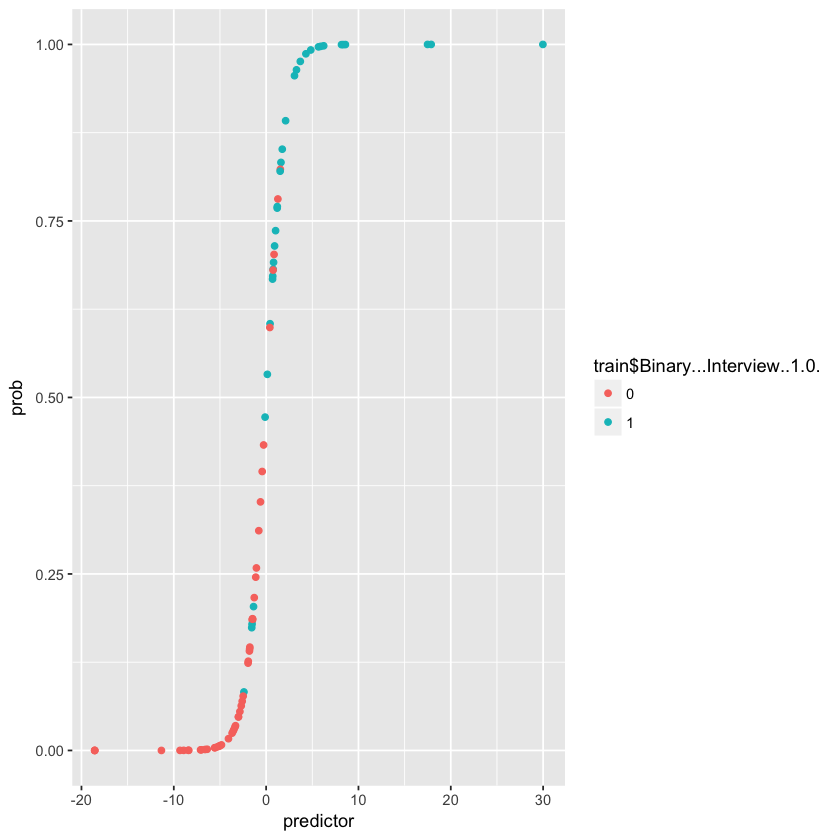

In [315]:
#Blue dot represents the probability of getting an interview;
#if it lies above prob 0.5 then it indicates the correctly predicted prob

#Similarly, Red dot represents the probability of not getting an interview;
#if it lies below prob 0.5 then it indicates the correctly predicted prob
ggplot(lr_data, aes(x=predictor, y=prob, color=train$Binary...Interview..1.0.)) + geom_point()

In [316]:
# Evaluation on Training Set

cutoff <- 0
One_true <- sum(lr_data$predictor > cutoff & lr_data$Binary...Interview..1.0.==1) 
One_false <- sum(lr_data$predictor <= cutoff & lr_data$Binary...Interview..1.0.==1) 


Zero_true <- sum(lr_data$predictor <= cutoff & lr_data$Binary...Interview..1.0.==0) 
Zero_false <- sum(lr_data$predictor > cutoff & lr_data$Binary...Interview..1.0.==0) 


tp <- One_true/(One_true + One_false)
tn <- Zero_true/(Zero_true + Zero_false)
c('True Positive', tp)
c('True Negative', tn)

[1] "True Positive"     "0.848484848484849"

[1] "True Negative"     "0.901960784313726"

In [317]:
# Seeking high confidence for positive result (Getting an interview call)
newlogitpred = ifelse(newlogit$fitted.values > 0.7, 1, 0)

# Confusion Matrix
table(newlogitpred, train$Binary...Interview..1.0.)

            
newlogitpred  0  1
           0 48 11
           1  3 22

In [318]:
# Training Accuracy
mean(newlogitpred==train$Binary...Interview..1.0.)

[1] 0.8333333

In [319]:
#Training AUC
roc_obj <- roc(train$Binary...Interview..1.0., lr_data$predictor)
auc(roc_obj)

Area under the curve: 0.9394

In [320]:
# ============= Evaluating on Test Set ===================================

In [321]:
test_linear_predictors <- predict(newlogit, test, type='link')
test_fitted_values <- predict(newlogit, test, type='response')

lr_test <- data.frame(predictor=test_linear_predictors, prob=test_fitted_values, Binary...Interview..1.0.= test$Binary...Interview..1.0.)

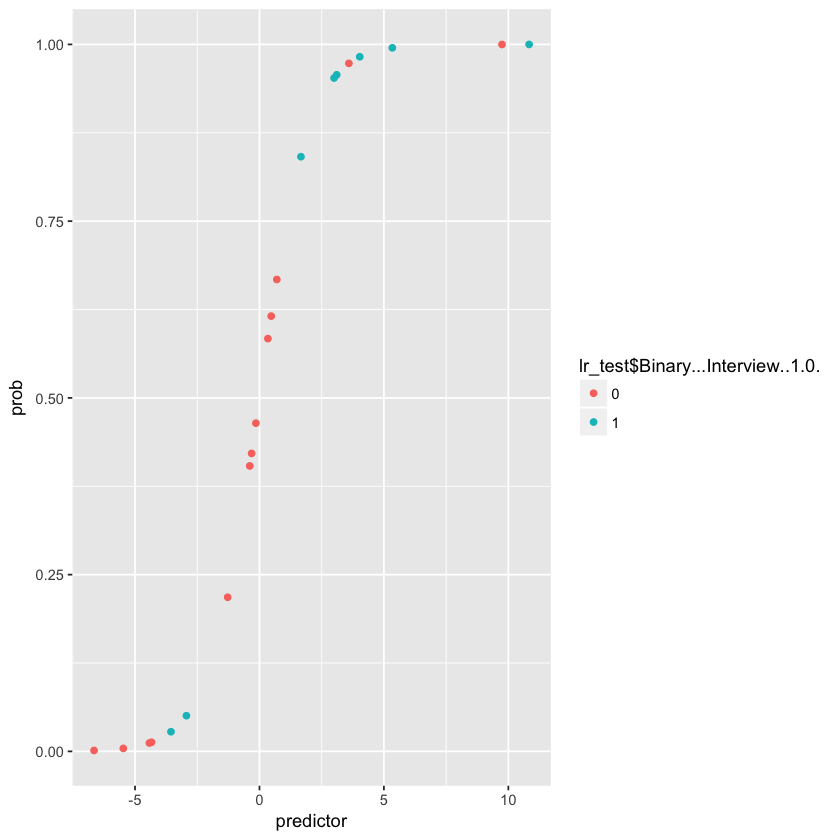

In [322]:
#Blue dot represents the probability of getting an interview;
#if it lies above prob 0.5 then it indicates the correctly predicted prob

#Similarly, Red dot represents the probability of not getting an interview;
#if it lies below prob 0.5 then it indicates the correctly predicted prob
ggplot(lr_test, aes(x=predictor, y=prob, color=lr_test$Binary...Interview..1.0.)) + geom_point()

In [323]:
# Evaluation on Test Set

cutoff <- 0
One_true <- sum(lr_test$predictor > cutoff & lr_test$Binary...Interview..1.0.==1) 
One_false <- sum(lr_test$predictor <= cutoff & lr_test$Binary...Interview..1.0.==1) 


Zero_true <- sum(lr_test$predictor <= cutoff & lr_test$Binary...Interview..1.0.==0) 
Zero_false <- sum(lr_test$predictor > cutoff & lr_test$Binary...Interview..1.0.==0) 


tp <- One_true/(One_true + One_false)
tn <- Zero_true/(Zero_true + Zero_false)

c('True Positive', tp)
c('True Negative', tn)

[1] "True Positive" "0.75"

[1] "True Negative"     "0.615384615384615"

In [324]:
# Using same threshold as before
newlogitpred = ifelse(lr_test$prob > 0.7, 1, 0)

# Confusion Matrix
table(newlogitpred,test$Binary...Interview..1.0.)

            
newlogitpred  0  1
           0 11  2
           1  2  6

In [325]:
# Test Accuracy
mean(newlogitpred==test$Binary...Interview..1.0.)

[1] 0.8095238

In [326]:
#Test AUC
roc_obj <- roc(test$Binary...Interview..1.0., lr_test$predictor)
auc(roc_obj)

Area under the curve: 0.75